## Data Preprocessing and EDA

In [400]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random
import os
import re
import warnings

#import sklearn
#import tensorflow as tf

pd.options.display.max_columns = 100
pd.options.display.max_rows =  200
pd.options.display.max_info_rows = 1690785
pd.options.display.max_info_columns = 200
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.date_dayfirst = True

In [401]:
# google colab use
from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [402]:
df_original = pd.read_excel('/content/drive/MyDrive/data/data_hh.xlsx')
df_original

,id,name,description,employment,schedule,accept_handicapped,accept_kids,experience,salary,published_at,type,has_test,specializations,working_days,working_time_intervals,professional_roles,working_time_modes,accept_temporary,driver_license_types,languages
0,80189492,Продавец-консультант Kiko Milano (косметически...,"<p><strong>Стань частью молодой, креативной, ц...","{'id': 'full', 'name': 'Полная занятость'}","{'id': 'flexible', 'name': 'Гибкий график'}",False,False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'from': 70000, 'to': None, 'currency': 'RUR',...",2023-12-02T12:13:34+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '97', 'name': 'Продавец-консультант, п...",[],False,[],[]
1,89080737,Менеджер по продажам\работе с клиентами\туризму,<p><strong>Приглашаем менеджера на постоянную ...,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'from': 60000, 'to': 80000, 'currency': 'RUR'...",2023-12-02T08:53:24+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '72', 'name': 'Менеджер по туризму'}]",[],False,[],[]
2,90250522,Менеджер проектов по автоматизации,<p>ЭФКО – это одна из крупнейших продуктовых К...,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'from': 130000, 'to': None, 'currency': 'RUR'...",2023-12-04T08:48:21+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '107', 'name': 'Руководитель проектов'}]",[],False,[],[]
3,90071148,Методист ДПО (центр безопасности и охраны труда),<strong>Обязанности:</strong> <ul> <li>Куриров...,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'from': 75000, 'to': None, 'currency': 'RUR',...",2023-11-29T09:38:59+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '167', 'name': 'Методист'}]",[],False,[],[]
4,90281928,Ведущий трейд-маркетолог,<strong>Обязанности:</strong> <ul> <li>Разрабо...,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...",NaN,2023-12-04T14:21:02+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '68', 'name': 'Менеджер по маркетингу,...",[],False,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,87855946,Менеджер по продвижению программных продуктов ...,<p><strong>Менеджер по продвижению программных...,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",NaN,2023-11-24T19:42:47+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '70', 'name': 'Менеджер по продажам, м...",[],False,[],[]
8716,87301208,Системный архитектор (Architecture & Systems E...,<p>Мы ищем<em> <strong>Системного архитектора<...,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",NaN,2023-11-20T16:56:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '40', 'name': 'Другое'}]",[],False,[],[]
8717,85865752,Экономист по труду и заработной плате,<p><strong>Приглашаем на работу Экономиста по ...,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...",NaN,2023-12-04T10:09:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '142', 'name': 'Экономист'}]",[],False,[],[]
8718,90043692,"Продавец (Москва, Малыгина, 1)",<p><strong> «Пятерочка» приглашает на вакансию...,"{'id': 'full', 'name': 'Полная занятость'}","{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'from': 47000, 'to': 60200, 'currenc

In [403]:
df = df_original.copy()
df.isna().sum()

id                           0
name                         0
description                  0
employment                   0
schedule                     0
accept_handicapped           0
accept_kids                  0
experience                   0
salary                    2403
published_at                 0
type                         0
has_test                     0
specializations              0
working_days                 0
working_time_intervals       0
professional_roles           0
working_time_modes           0
accept_temporary             0
driver_license_types         0
languages                    0
dtype: int64

In [404]:
df['employment'].unique()

array(["{'id': 'full', 'name': 'Полная занятость'}",
       "{'id': 'part', 'name': 'Частичная занятость'}",
       "{'id': 'project', 'name': 'Проектная работа'}",
       "{'id': 'probation', 'name': 'Стажировка'}"], dtype=object)

In [405]:
df['full time'] = df['employment'] == "{'id': 'full', 'name': 'Полная занятость'}"
df['part time'] = df['employment'] == "{'id': 'part', 'name': 'Частичная занятость'}"
df['project work'] = df['employment'] == "{'id': 'project', 'name': 'Проектная работа'}"
df['internship'] = df['employment'] == "{'id': 'probation', 'name': 'Стажировка'}"
df = df.drop('employment', axis=1)
df

,id,name,description,schedule,accept_handicapped,accept_kids,experience,salary,published_at,type,has_test,specializations,working_days,working_time_intervals,professional_roles,working_time_modes,accept_temporary,driver_license_types,languages,full time,part time,project work,internship
0,80189492,Продавец-консультант Kiko Milano (косметически...,"<p><strong>Стань частью молодой, креативной, ц...","{'id': 'flexible', 'name': 'Гибкий график'}",False,False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'from': 70000, 'to': None, 'currency': 'RUR',...",2023-12-02T12:13:34+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '97', 'name': 'Продавец-консультант, п...",[],False,[],[],True,False,False,False
1,89080737,Менеджер по продажам\работе с клиентами\туризму,<p><strong>Приглашаем менеджера на постоянную ...,"{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'from': 60000, 'to': 80000, 'currency': 'RUR'...",2023-12-02T08:53:24+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '72', 'name': 'Менеджер по туризму'}]",[],False,[],[],True,False,False,False
2,90250522,Менеджер проектов по автоматизации,<p>ЭФКО – это одна из крупнейших продуктовых К...,"{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'from': 130000, 'to': None, 'currency': 'RUR'...",2023-12-04T08:48:21+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '107', 'name': 'Руководитель проектов'}]",[],False,[],[],True,False,False,False
3,90071148,Методист ДПО (центр безопасности и охраны труда),<strong>Обязанности:</strong> <ul> <li>Куриров...,"{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'from': 75000, 'to': None, 'currency': 'RUR',...",2023-11-29T09:38:59+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '167', 'name': 'Методист'}]",[],False,[],[],True,False,False,False
4,90281928,Ведущий трейд-маркетолог,<strong>Обязанности:</strong> <ul> <li>Разрабо...,"{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...",NaN,2023-12-04T14:21:02+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '68', 'name': 'Менеджер по маркетингу,...",[],False,[],[],True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,87855946,Менеджер по продвижению программных продуктов ...,<p><strong>Менеджер по продвижению программных...,"{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",NaN,2023-11-24T19:42:47+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '70', 'name': 'Менеджер по продажам, м...",[],False,[],[],True,False,False,False
8716,87301208,Системный архитектор (Architecture & Systems E...,<p>Мы ищем<em> <strong>Системного архитектора<...,"{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",NaN,2023-11-20T16:56:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '40', 'name': 'Другое'}]",[],False,[],[],True,False,False,False
8717,85865752,Экономист по труду и заработной плате,<p><strong>Приглашаем на работу Экономиста по ...,"{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...",NaN,2023-12-04T10:09:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '142', 'name': 'Экономист'}]",[],False,[],[],True,False,False,False
8718,90043692,"Продавец (Москва, Малыгина, 1)",<p><strong> «Пятерочка» приглашает на вакансию...,"{'id': 'fullDay', 'name': 'Полный день'}",False,False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'from': 47000, 'to': 60200, 'currency': 'RUR'...",2023-11-28T14:17:40+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': '97', 'name': 'Продавец-кон

In [406]:
df['schedule'].unique()

array(["{'id': 'flexible', 'name': 'Гибкий график'}",
       "{'id': 'fullDay', 'name': 'Полный день'}",
       "{'id': 'shift', 'name': 'Сменный график'}",
       "{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}",
       "{'id': 'remote', 'name': 'Удаленная работа'}"], dtype=object)

In [407]:
df['flexible schedule'] = df['schedule'] == "{'id': 'flexible', 'name': 'Гибкий график'}"
df['full day'] = df['schedule'] == "{'id': 'fullDay', 'name': 'Полный день'}"
df['shift'] = df['schedule'] == "{'id': 'shift', 'name': 'Сменный график'}"
df['flyInFlyOut'] = df['schedule'] == "{'id': 'flyInFlyOut', 'name': 'Вахтовый метод'}"
df['remote'] = df['schedule'] == "{'id': 'remote', 'name': 'Удаленная работа'}"
df = df.drop('schedule', axis=1)
df

,id,name,description,accept_handicapped,accept_kids,experience,salary,published_at,type,has_test,specializations,working_days,working_time_intervals,professional_roles,working_time_modes,accept_temporary,driver_license_types,languages,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote
0,80189492,Продавец-консультант Kiko Milano (косметически...,"<p><strong>Стань частью молодой, креативной, ц...",False,False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'from': 70000, 'to': None, 'currency': 'RUR',...",2023-12-02T12:13:34+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '97', 'name': 'Продавец-консультант, п...",[],False,[],[],True,False,False,False,True,False,False,False,False
1,89080737,Менеджер по продажам\работе с клиентами\туризму,<p><strong>Приглашаем менеджера на постоянную ...,False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'from': 60000, 'to': 80000, 'currency': 'RUR'...",2023-12-02T08:53:24+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '72', 'name': 'Менеджер по туризму'}]",[],False,[],[],True,False,False,False,False,True,False,False,False
2,90250522,Менеджер проектов по автоматизации,<p>ЭФКО – это одна из крупнейших продуктовых К...,False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'from': 130000, 'to': None, 'currency': 'RUR'...",2023-12-04T08:48:21+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '107', 'name': 'Руководитель проектов'}]",[],False,[],[],True,False,False,False,False,True,False,False,False
3,90071148,Методист ДПО (центр безопасности и охраны труда),<strong>Обязанности:</strong> <ul> <li>Куриров...,False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'from': 75000, 'to': None, 'currency': 'RUR',...",2023-11-29T09:38:59+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '167', 'name': 'Методист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False
4,90281928,Ведущий трейд-маркетолог,<strong>Обязанности:</strong> <ul> <li>Разрабо...,False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...",NaN,2023-12-04T14:21:02+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '68', 'name': 'Менеджер по маркетингу,...",[],False,[],[],True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,87855946,Менеджер по продвижению программных продуктов ...,<p><strong>Менеджер по продвижению программных...,False,False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",NaN,2023-11-24T19:42:47+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '70', 'name': 'Менеджер по продажам, м...",[],False,[],[],True,False,False,False,False,True,False,False,False
8716,87301208,Системный архитектор (Architecture & Systems E...,<p>Мы ищем<em> <strong>Системного архитектора<...,False,False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",NaN,2023-11-20T16:56:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '40', 'name': 'Другое'}]",[],False,[],[],True,False,False,False,False,True,False,False,False
8717,85865752,Экономист по труду и заработной плате,<p><strong>Приглашаем на работу Экономиста по ...,False,False,"{'id': 'between1And3', 'name': 'От 1 года до 3...",NaN,2023-12-04T10:09:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '142', 'name': 'Экономист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False
8718,90043692,"Продавец (Москва, Малыгина, 1)",<p><strong> «Пятерочка» приглашает на вакансию...,False,False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'from': 47000, 'to': 60200, 'currency': 'RUR'...",2023-11-28T14:17:40+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': '97', 'name': 'Продавец-консультант, п...","[{'id': 'start_after_sixteen', 'name': 'Можно ...",False,[],[],True,False,False,Fa

In [408]:
df['experience'].unique()

array(["{'id': 'noExperience', 'name': 'Нет опыта'}",
       "{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}",
       "{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",
       "{'id': 'moreThan6', 'name': 'Более 6 лет'}"], dtype=object)

In [409]:
df['work_exp 1-3'] = df['experience'] == "{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}"
df['work_exp 3-6'] = df['experience'] == "{'id': 'between3And6', 'name': 'От 3 до 6 лет'}"
df['work_exp 6'] = df['experience'] == "{'id': 'moreThan6', 'name': 'Более 6 лет'}"
df = df.drop('experience', axis=1)
df

,id,name,description,accept_handicapped,accept_kids,salary,published_at,type,has_test,specializations,working_days,working_time_intervals,professional_roles,working_time_modes,accept_temporary,driver_license_types,languages,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6
0,80189492,Продавец-консультант Kiko Milano (косметически...,"<p><strong>Стань частью молодой, креативной, ц...",False,False,"{'from': 70000, 'to': None, 'currency': 'RUR',...",2023-12-02T12:13:34+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '97', 'name': 'Продавец-консультант, п...",[],False,[],[],True,False,False,False,True,False,False,False,False,False,False,False
1,89080737,Менеджер по продажам\работе с клиентами\туризму,<p><strong>Приглашаем менеджера на постоянную ...,False,False,"{'from': 60000, 'to': 80000, 'currency': 'RUR'...",2023-12-02T08:53:24+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '72', 'name': 'Менеджер по туризму'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False
2,90250522,Менеджер проектов по автоматизации,<p>ЭФКО – это одна из крупнейших продуктовых К...,False,False,"{'from': 130000, 'to': None, 'currency': 'RUR'...",2023-12-04T08:48:21+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '107', 'name': 'Руководитель проектов'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False
3,90071148,Методист ДПО (центр безопасности и охраны труда),<strong>Обязанности:</strong> <ul> <li>Куриров...,False,False,"{'from': 75000, 'to': None, 'currency': 'RUR',...",2023-11-29T09:38:59+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '167', 'name': 'Методист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False
4,90281928,Ведущий трейд-маркетолог,<strong>Обязанности:</strong> <ul> <li>Разрабо...,False,False,NaN,2023-12-04T14:21:02+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '68', 'name': 'Менеджер по маркетингу,...",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,87855946,Менеджер по продвижению программных продуктов ...,<p><strong>Менеджер по продвижению программных...,False,False,NaN,2023-11-24T19:42:47+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '70', 'name': 'Менеджер по продажам, м...",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False
8716,87301208,Системный архитектор (Architecture & Systems E...,<p>Мы ищем<em> <strong>Системного архитектора<...,False,False,NaN,2023-11-20T16:56:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '40', 'name': 'Другое'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False
8717,85865752,Экономист по труду и заработной плате,<p><strong>Приглашаем на работу Экономиста по ...,False,False,NaN,2023-12-04T10:09:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '142', 'name': 'Экономист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False
8718,90043692,"Продавец (Москва, Малыгина, 1)",<p><strong> «Пятерочка» приглашает на вакансию...,False,False,"{'from': 47000, 'to': 60200, 'currency': 'RUR'...",2023-11-28T14:17:40+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': '97', 'name': 'Продавец-консультант, п...","[{'id': 'start_after_sixteen', 'name': 'Можно ...",False,[],[],True,False,False,False,False,True,False,False,False,False,False,False


In [410]:
df['salary'].unique()

array(["{'from': 70000, 'to': None, 'currency': 'RUR', 'gross': False}",
       "{'from': 60000, 'to': 80000, 'currency': 'RUR', 'gross': False}",
       "{'from': 130000, 'to': None, 'currency': 'RUR', 'gross': True}",
       ...,
       "{'from': 44500, 'to': 49000, 'currency': 'RUR', 'gross': True}",
       "{'from': 54600, 'to': 59300, 'currency': 'RUR', 'gross': True}",
       "{'from': None, 'to': 105000, 'currency': 'RUR', 'gross': False}"],
      dtype=object)

In [411]:
import ast

dict_srs = df[~df['salary'].isna()]['salary'].map(ast.literal_eval)
dict_srs

0       {'from': 70000, 'to': None, 'currency': 'RUR',...
1       {'from': 60000, 'to': 80000, 'currency': 'RUR'...
2       {'from': 130000, 'to': None, 'currency': 'RUR'...
3       {'from': 75000, 'to': None, 'currency': 'RUR',...
6       {'from': 40000, 'to': 45000, 'currency': 'RUR'...
                              ...                        
8710    {'from': 150000, 'to': None, 'currency': 'RUR'...
8711    {'from': 120000, 'to': None, 'currency': 'RUR'...
8712    {'from': 67000, 'to': 80000, 'currency': 'RUR'...
8718    {'from': 47000, 'to': 60200, 'currency': 'RUR'...
8719    {'from': 50000, 'to': None, 'currency': 'RUR',...
Name: salary, Length: 6317, dtype: object

In [412]:
df['salary from'] = dict_srs.apply(lambda x: x.get('from'))
df['salary to'] = dict_srs.apply(lambda x: x.get('to'))
df['salary curr'] = dict_srs.apply(lambda x: x.get('currency'))
df['salary is_gross'] = dict_srs.apply(lambda x: x.get('gross'))
df = df.drop('salary', axis=1)
df

,id,name,description,accept_handicapped,accept_kids,published_at,type,has_test,specializations,working_days,working_time_intervals,professional_roles,working_time_modes,accept_temporary,driver_license_types,languages,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6,salary from,salary to,salary curr,salary is_gross
0,80189492,Продавец-консультант Kiko Milano (косметически...,"<p><strong>Стань частью молодой, креативной, ц...",False,False,2023-12-02T12:13:34+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '97', 'name': 'Продавец-консультант, п...",[],False,[],[],True,False,False,False,True,False,False,False,False,False,False,False,"70,000.00",NaN,RUR,False
1,89080737,Менеджер по продажам\работе с клиентами\туризму,<p><strong>Приглашаем менеджера на постоянную ...,False,False,2023-12-02T08:53:24+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '72', 'name': 'Менеджер по туризму'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"60,000.00","80,000.00",RUR,False
2,90250522,Менеджер проектов по автоматизации,<p>ЭФКО – это одна из крупнейших продуктовых К...,False,False,2023-12-04T08:48:21+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '107', 'name': 'Руководитель проектов'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"130,000.00",NaN,RUR,True
3,90071148,Методист ДПО (центр безопасности и охраны труда),<strong>Обязанности:</strong> <ul> <li>Куриров...,False,False,2023-11-29T09:38:59+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '167', 'name': 'Методист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"75,000.00",NaN,RUR,True
4,90281928,Ведущий трейд-маркетолог,<strong>Обязанности:</strong> <ul> <li>Разрабо...,False,False,2023-12-04T14:21:02+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '68', 'name': 'Менеджер по маркетингу,...",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,87855946,Менеджер по продвижению программных продуктов ...,<p><strong>Менеджер по продвижению программных...,False,False,2023-11-24T19:42:47+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '70', 'name': 'Менеджер по продажам, м...",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,NaN,NaN
8716,87301208,Системный архитектор (Architecture & Systems E...,<p>Мы ищем<em> <strong>Системного архитектора<...,False,False,2023-11-20T16:56:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '40', 'name': 'Другое'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,NaN,NaN
8717,85865752,Экономист по труду и заработной плате,<p><strong>Приглашаем на работу Экономиста по ...,False,False,2023-12-04T10:09:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '142', 'name': 'Экономист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,NaN,NaN
8718,90043692,"Продавец (Москва, Малыгина, 1)",<p><strong> «Пятерочка» приглашает на вакансию...,False,False,2023-11-28T14:17:40+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': '97', 'name': 'Продавец-консультант, п...","[{'id': 'start_after_sixteen', 'name': 'Можно ...",False,[],[],True,False,False,False,False,True,False,False,False,False,False,False,"47,000.00","60,200.00",RUR,True


In [413]:
df['salary curr'].unique()

array(['RUR', nan, 'EUR', 'USD'], dtype=object)

In [414]:
df[df['salary curr'] == 'USD']

,id,name,description,accept_handicapped,accept_kids,published_at,type,has_test,specializations,working_days,working_time_intervals,professional_roles,working_time_modes,accept_temporary,driver_license_types,languages,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6,salary from,salary to,salary curr,salary is_gross
1159,90099424,Junior product manager,<p><strong>Привет! Мы - команда Nexpanse</stro...,False,False,2023-11-29T15:00:11+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '73', 'name': 'Менеджер продукта'}]",[],False,[],"[{'id': 'eng', 'name': 'Английский', 'level': ...",True,False,False,False,False,False,False,False,True,True,False,False,NaN,800.00,USD,False
1298,89152086,Маркетолог/Бренд-менеджер (Американская компания),"<p><strong>Привет, кандидат!</strong></p> <p>G...",False,False,2023-11-07T15:34:21+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '68', 'name': 'Менеджер по маркетингу,...",[],False,[],"[{'id': 'eng', 'name': 'Английский', 'level': ...",True,False,False,False,False,False,False,False,True,False,False,True,"2,000.00","3,000.00",USD,False
5323,89389510,Креативный копирайтер (Арбитраж трафика),"<p><em>Привет! Мы - арбитражная команда, закуп...",False,False,2023-11-13T15:46:18+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '55', 'name': 'Копирайтер, редактор, к...",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,NaN,700.00,USD,False
5528,87587653,Account-manager (mit Deutschkenntnissen) mit С1,<p>Die <strong>MARIOKA</strong> ist ein stabil...,False,False,2023-12-04T10:33:58+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '70', 'name': 'Менеджер по продажам, м...",[],False,[],[],True,False,False,False,False,True,False,False,False,False,False,False,"1,900.00","3,000.00",USD,False
5865,90209421,Middle Frontend Developer,<p>Нахожусь в поиске <strong>Middle frontend р...,False,False,2023-12-01T16:10:11+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '96', 'name': 'Программист, разработчи...",[],False,[],"[{'id': 'eng', 'name': 'Английский', 'level': ...",True,False,False,False,False,True,False,False,False,True,False,False,"1,500.00",NaN,USD,False
6034,90201174,Директор по экономике,"<p>Таджикистан, Душанбе</p> <p>Требуемый опыт ...",False,False,2023-12-01T14:20:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '135', 'name': 'Финансовый директор (C...",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False,"2,000.00","5,000.00",USD,False
6529,89806697,Fullstack JS developer (typescript/nodejs/react),<p>Для работы над криптовалютными и финтех про...,False,False,2023-11-22T22:35:33+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '96', 'name': 'Программист, разработчи...",[],False,[],[],True,False,False,False,False,False,False,False,True,False,True,False,"3,000.00","5,000.00",USD,False
6731,90212786,Copywriter,<p>We are pleased to announce that due to an i...,False,False,2023-12-01T17:03:53+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '55', 'name': 'Копирайтер, редактор, к...",[],False,[],"[{'id': 'eng', 'name': 'Английский', 'level': ...",True,False,False,False,False,False,False,False,True,False,False,False,NaN,"1,200.00",USD,False
7501,90005929,Junior Product Manager,<p>В небольшую стартап студию требуется энерги...,False,False,2023-11-27T23:09:32+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '73', 'name': 'Менеджер продукта'}]",[],False,[],"[{'id': 'eng', 'name': 'Английский', 'level': ...",True,False,False,False,False,True,False,False,False,True,False,False,"1,500.00","2,000.00",USD,False


In [415]:
df.loc[(df['salary curr'] == 'EUR') & (~df['salary from'].isna()), 'salary from'] = df['salary from'] * 97.6754
df.loc[(df['salary curr'] == 'EUR') & (~df['salary to'].isna()), 'salary to'] = df['salary to'] * 97.6754

df.loc[(df['salary curr'] == 'USD') & (~df['salary from'].isna()), 'salary from'] = df['salary from'] * 90.4128
df.loc[(df['salary curr'] == 'USD') & (~df['salary to'].isna()), 'salary to'] = df['salary to'] * 90.4128

df['salary curr'] = df['salary curr'].fillna('RUR')
df

,id,name,description,accept_handicapped,accept_kids,published_at,type,has_test,specializations,working_days,working_time_intervals,professional_roles,working_time_modes,accept_temporary,driver_license_types,languages,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6,salary from,salary to,salary curr,salary is_gross
0,80189492,Продавец-консультант Kiko Milano (косметически...,"<p><strong>Стань частью молодой, креативной, ц...",False,False,2023-12-02T12:13:34+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '97', 'name': 'Продавец-консультант, п...",[],False,[],[],True,False,False,False,True,False,False,False,False,False,False,False,"70,000.00",NaN,RUR,False
1,89080737,Менеджер по продажам\работе с клиентами\туризму,<p><strong>Приглашаем менеджера на постоянную ...,False,False,2023-12-02T08:53:24+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '72', 'name': 'Менеджер по туризму'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"60,000.00","80,000.00",RUR,False
2,90250522,Менеджер проектов по автоматизации,<p>ЭФКО – это одна из крупнейших продуктовых К...,False,False,2023-12-04T08:48:21+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '107', 'name': 'Руководитель проектов'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"130,000.00",NaN,RUR,True
3,90071148,Методист ДПО (центр безопасности и охраны труда),<strong>Обязанности:</strong> <ul> <li>Куриров...,False,False,2023-11-29T09:38:59+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '167', 'name': 'Методист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"75,000.00",NaN,RUR,True
4,90281928,Ведущий трейд-маркетолог,<strong>Обязанности:</strong> <ul> <li>Разрабо...,False,False,2023-12-04T14:21:02+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '68', 'name': 'Менеджер по маркетингу,...",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,87855946,Менеджер по продвижению программных продуктов ...,<p><strong>Менеджер по продвижению программных...,False,False,2023-11-24T19:42:47+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '70', 'name': 'Менеджер по продажам, м...",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN
8716,87301208,Системный архитектор (Architecture & Systems E...,<p>Мы ищем<em> <strong>Системного архитектора<...,False,False,2023-11-20T16:56:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '40', 'name': 'Другое'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN
8717,85865752,Экономист по труду и заработной плате,<p><strong>Приглашаем на работу Экономиста по ...,False,False,2023-12-04T10:09:49+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],[],"[{'id': '142', 'name': 'Экономист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN
8718,90043692,"Продавец (Москва, Малыгина, 1)",<p><strong> «Пятерочка» приглашает на вакансию...,False,False,2023-11-28T14:17:40+0300,"{'id': 'open', 'name': 'Открытая'}",False,[],[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': '97', 'name': 'Продавец-консультант, п...","[{'id': 'start_after_sixteen', 'name': 'Можно ...",False,[],[],True,False,False,False,False,True,False,False,False,False,False,False,"47,000.00","60,200.00",RUR,True


In [416]:
df['type'].unique()

array(["{'id': 'open', 'name': 'Открытая'}",
       "{'id': 'anonymous', 'name': 'Анонимная'}"], dtype=object)

In [417]:
df['anonymous'] = df['type'] == "{'id': 'anonymous', 'name': 'Анонимная'}"
df = df.drop('type', axis=1)
df

,id,name,description,accept_handicapped,accept_kids,published_at,has_test,specializations,working_days,working_time_intervals,professional_roles,working_time_modes,accept_temporary,driver_license_types,languages,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6,salary from,salary to,salary curr,salary is_gross,anonymous
0,80189492,Продавец-консультант Kiko Milano (косметически...,"<p><strong>Стань частью молодой, креативной, ц...",False,False,2023-12-02T12:13:34+0300,False,[],[],[],"[{'id': '97', 'name': 'Продавец-консультант, п...",[],False,[],[],True,False,False,False,True,False,False,False,False,False,False,False,"70,000.00",NaN,RUR,False,False
1,89080737,Менеджер по продажам\работе с клиентами\туризму,<p><strong>Приглашаем менеджера на постоянную ...,False,False,2023-12-02T08:53:24+0300,False,[],[],[],"[{'id': '72', 'name': 'Менеджер по туризму'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"60,000.00","80,000.00",RUR,False,False
2,90250522,Менеджер проектов по автоматизации,<p>ЭФКО – это одна из крупнейших продуктовых К...,False,False,2023-12-04T08:48:21+0300,False,[],[],[],"[{'id': '107', 'name': 'Руководитель проектов'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"130,000.00",NaN,RUR,True,False
3,90071148,Методист ДПО (центр безопасности и охраны труда),<strong>Обязанности:</strong> <ul> <li>Куриров...,False,False,2023-11-29T09:38:59+0300,False,[],[],[],"[{'id': '167', 'name': 'Методист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"75,000.00",NaN,RUR,True,False
4,90281928,Ведущий трейд-маркетолог,<strong>Обязанности:</strong> <ul> <li>Разрабо...,False,False,2023-12-04T14:21:02+0300,False,[],[],[],"[{'id': '68', 'name': 'Менеджер по маркетингу,...",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,87855946,Менеджер по продвижению программных продуктов ...,<p><strong>Менеджер по продвижению программных...,False,False,2023-11-24T19:42:47+0300,False,[],[],[],"[{'id': '70', 'name': 'Менеджер по продажам, м...",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN,False
8716,87301208,Системный архитектор (Architecture & Systems E...,<p>Мы ищем<em> <strong>Системного архитектора<...,False,False,2023-11-20T16:56:49+0300,False,[],[],[],"[{'id': '40', 'name': 'Другое'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN,False
8717,85865752,Экономист по труду и заработной плате,<p><strong>Приглашаем на работу Экономиста по ...,False,False,2023-12-04T10:09:49+0300,False,[],[],[],"[{'id': '142', 'name': 'Экономист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN,False
8718,90043692,"Продавец (Москва, Малыгина, 1)",<p><strong> «Пятерочка» приглашает на вакансию...,False,False,2023-11-28T14:17:40+0300,False,[],[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': '97', 'name': 'Продавец-консультант, п...","[{'id': 'start_after_sixteen', 'name': 'Можно ...",False,[],[],True,False,False,False,False,True,False,False,False,False,False,False,"47,000.00","60,200.00",RUR,True,False


In [418]:
df['specializations'].unique()

array(['[]'], dtype=object)

In [419]:
df = df.drop('specializations', axis=1)
df

,id,name,description,accept_handicapped,accept_kids,published_at,has_test,working_days,working_time_intervals,professional_roles,working_time_modes,accept_temporary,driver_license_types,languages,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6,salary from,salary to,salary curr,salary is_gross,anonymous
0,80189492,Продавец-консультант Kiko Milano (косметически...,"<p><strong>Стань частью молодой, креативной, ц...",False,False,2023-12-02T12:13:34+0300,False,[],[],"[{'id': '97', 'name': 'Продавец-консультант, п...",[],False,[],[],True,False,False,False,True,False,False,False,False,False,False,False,"70,000.00",NaN,RUR,False,False
1,89080737,Менеджер по продажам\работе с клиентами\туризму,<p><strong>Приглашаем менеджера на постоянную ...,False,False,2023-12-02T08:53:24+0300,False,[],[],"[{'id': '72', 'name': 'Менеджер по туризму'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"60,000.00","80,000.00",RUR,False,False
2,90250522,Менеджер проектов по автоматизации,<p>ЭФКО – это одна из крупнейших продуктовых К...,False,False,2023-12-04T08:48:21+0300,False,[],[],"[{'id': '107', 'name': 'Руководитель проектов'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"130,000.00",NaN,RUR,True,False
3,90071148,Методист ДПО (центр безопасности и охраны труда),<strong>Обязанности:</strong> <ul> <li>Куриров...,False,False,2023-11-29T09:38:59+0300,False,[],[],"[{'id': '167', 'name': 'Методист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,"75,000.00",NaN,RUR,True,False
4,90281928,Ведущий трейд-маркетолог,<strong>Обязанности:</strong> <ul> <li>Разрабо...,False,False,2023-12-04T14:21:02+0300,False,[],[],"[{'id': '68', 'name': 'Менеджер по маркетингу,...",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,87855946,Менеджер по продвижению программных продуктов ...,<p><strong>Менеджер по продвижению программных...,False,False,2023-11-24T19:42:47+0300,False,[],[],"[{'id': '70', 'name': 'Менеджер по продажам, м...",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN,False
8716,87301208,Системный архитектор (Architecture & Systems E...,<p>Мы ищем<em> <strong>Системного архитектора<...,False,False,2023-11-20T16:56:49+0300,False,[],[],"[{'id': '40', 'name': 'Другое'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN,False
8717,85865752,Экономист по труду и заработной плате,<p><strong>Приглашаем на работу Экономиста по ...,False,False,2023-12-04T10:09:49+0300,False,[],[],"[{'id': '142', 'name': 'Экономист'}]",[],False,[],[],True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN,False
8718,90043692,"Продавец (Москва, Малыгина, 1)",<p><strong> «Пятерочка» приглашает на вакансию...,False,False,2023-11-28T14:17:40+0300,False,[],"[{'id': 'from_four_to_six_hours_in_a_day', 'na...","[{'id': '97', 'name': 'Продавец-консультант, п...","[{'id': 'start_after_sixteen', 'name': 'Можно ...",False,[],[],True,False,False,False,False,True,False,False,False,False,False,False,"47,000.00","60,200.00",RUR,True,False


In [420]:
df['working_days'].value_counts()

[]                                                                                   8397
[{'id': 'only_saturday_and_sunday', 'name': 'Работа только по\xa0сб\xa0и\xa0вс'}]     323
Name: working_days, dtype: int64

In [421]:
df = df.drop('working_days', axis=1)

In [422]:
dict_srs = df[~df['professional_roles'].isna()]['professional_roles'].map(ast.literal_eval)
df['professional_roles'] = dict_srs.apply(lambda x: x[0].get('name'))
df['professional_roles'].value_counts()

Продавец-консультант, продавец-кассир                             891
Другое                                                            808
Менеджер по продажам, менеджер по работе с клиентами              685
Повар, пекарь, кондитер                                           253
Упаковщик, комплектовщик                                          249
Программист, разработчик                                          235
Бухгалтер                                                         223
Водитель                                                          191
Администратор                                                     188
Официант, бармен, бариста                                         163
Менеджер по маркетингу, интернет-маркетолог                       156
Инженер-конструктор, инженер-проектировщик                        155
Секретарь, помощник руководителя, ассистент                       142
Курьер                                                            138
Кладовщик           

In [423]:
professional_roles_counts = df['professional_roles'].value_counts()
df.loc[(df['professional_roles'].isin(professional_roles_counts[:16].index)) & (df['professional_roles'] != 'Другое'), 'professional_roles common'] = df['professional_roles']
df['professional_roles common'].value_counts()

Продавец-консультант, продавец-кассир                   891
Менеджер по продажам, менеджер по работе с клиентами    685
Повар, пекарь, кондитер                                 253
Упаковщик, комплектовщик                                249
Программист, разработчик                                235
Бухгалтер                                               223
Водитель                                                191
Администратор                                           188
Официант, бармен, бариста                               163
Менеджер по маркетингу, интернет-маркетолог             156
Инженер-конструктор, инженер-проектировщик              155
Секретарь, помощник руководителя, ассистент             142
Курьер                                                  138
Кладовщик                                               136
Менеджер по закупкам                                    112
Name: professional_roles common, dtype: int64

<Axes: >

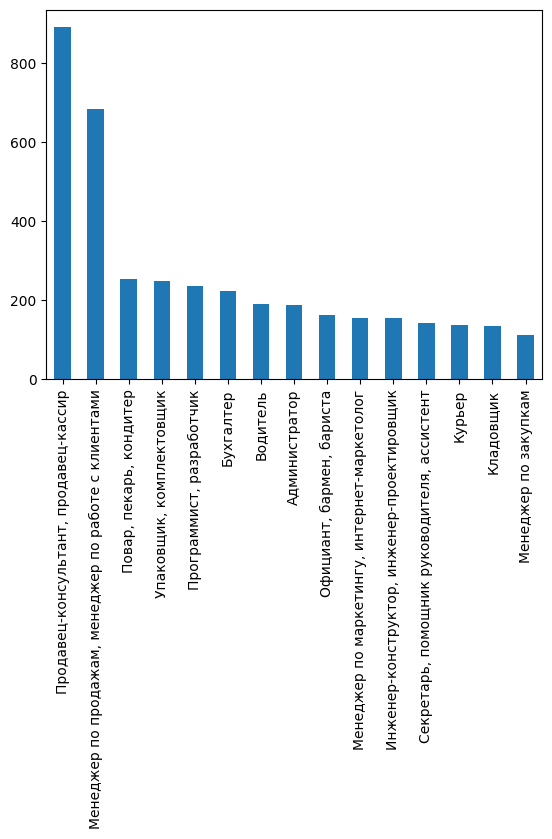

In [424]:
df['professional_roles common'].value_counts().plot(kind='bar')

In [425]:
df['working_time_intervals'].value_counts()

[]                                                                                                         8173
[{'id': 'from_four_to_six_hours_in_a_day', 'name': 'Можно работать сменами по\xa04–6 часов в\xa0день'}]     547
Name: working_time_intervals, dtype: int64

In [426]:
df = df.drop('working_time_intervals', axis=1)

In [427]:
df['working_time_modes'].value_counts()

[]                                                                                8244
[{'id': 'start_after_sixteen', 'name': 'Можно начинать работать после 16:00'}]     476
Name: working_time_modes, dtype: int64

In [428]:
df = df.drop('working_time_modes', axis=1)

In [429]:
df['driver_license_types'].value_counts()

[]                                                                                                             8636
[{'id': 'B'}]                                                                                                    68
[{'id': 'B'}, {'id': 'C'}]                                                                                        8
[{'id': 'B'}, {'id': 'D'}]                                                                                        2
[{'id': 'B'}, {'id': 'C'}, {'id': 'E'}]                                                                           1
[{'id': 'C'}]                                                                                                     1
[{'id': 'B'}, {'id': 'C'}, {'id': 'BE'}, {'id': 'CE'}]                                                            1
[{'id': 'A'}, {'id': 'B'}, {'id': 'C'}, {'id': 'D'}, {'id': 'E'}, {'id': 'BE'}, {'id': 'CE'}, {'id': 'DE'}]       1
[{'id': 'D'}]                                                           

In [430]:
df = df.drop('driver_license_types', axis=1)

In [431]:
df['languages'].value_counts()

[]                                                                                                                                                                                               8321
[{'id': 'eng', 'name': 'Английский', 'level': {'id': 'b1', 'name': 'B1 — Средний'}}]                                                                                                              109
[{'id': 'eng', 'name': 'Английский', 'level': {'id': 'b2', 'name': 'B2 — Средне-продвинутый'}}]                                                                                                    98
[{'id': 'eng', 'name': 'Английский', 'level': {'id': 'a1', 'name': 'A1 — Начальный'}}]                                                                                                             81
[{'id': 'eng', 'name': 'Английский', 'level': {'id': 'c1', 'name': 'C1 — Продвинутый'}}]                                                                                                           38
[{'id': 'e

In [432]:
df['has language reqs'] = df['languages'] != '[]'
df['has language reqs'].value_counts()

False    8321
True      399
Name: has language reqs, dtype: int64

In [433]:
df = df.drop('languages', axis=1)
df

,id,name,description,accept_handicapped,accept_kids,published_at,has_test,professional_roles,accept_temporary,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6,salary from,salary to,salary curr,salary is_gross,anonymous,professional_roles common,has language reqs
0,80189492,Продавец-консультант Kiko Milano (косметически...,"<p><strong>Стань частью молодой, креативной, ц...",False,False,2023-12-02T12:13:34+0300,False,"Продавец-консультант, продавец-кассир",False,True,False,False,False,True,False,False,False,False,False,False,False,"70,000.00",NaN,RUR,False,False,"Продавец-консультант, продавец-кассир",False
1,89080737,Менеджер по продажам\работе с клиентами\туризму,<p><strong>Приглашаем менеджера на постоянную ...,False,False,2023-12-02T08:53:24+0300,False,Менеджер по туризму,False,True,False,False,False,False,True,False,False,False,True,False,False,"60,000.00","80,000.00",RUR,False,False,NaN,False
2,90250522,Менеджер проектов по автоматизации,<p>ЭФКО – это одна из крупнейших продуктовых К...,False,False,2023-12-04T08:48:21+0300,False,Руководитель проектов,False,True,False,False,False,False,True,False,False,False,True,False,False,"130,000.00",NaN,RUR,True,False,NaN,False
3,90071148,Методист ДПО (центр безопасности и охраны труда),<strong>Обязанности:</strong> <ul> <li>Куриров...,False,False,2023-11-29T09:38:59+0300,False,Методист,False,True,False,False,False,False,True,False,False,False,True,False,False,"75,000.00",NaN,RUR,True,False,NaN,False
4,90281928,Ведущий трейд-маркетолог,<strong>Обязанности:</strong> <ul> <li>Разрабо...,False,False,2023-12-04T14:21:02+0300,False,"Менеджер по маркетингу, интернет-маркетолог",False,True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN,False,"Менеджер по маркетингу, интернет-маркетолог",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,87855946,Менеджер по продвижению программных продуктов ...,<p><strong>Менеджер по продвижению программных...,False,False,2023-11-24T19:42:47+0300,False,"Менеджер по продажам, менеджер по работе с кли...",False,True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN,False,"Менеджер по продажам, менеджер по работе с кли...",False
8716,87301208,Системный архитектор (Architecture & Systems E...,<p>Мы ищем<em> <strong>Системного архитектора<...,False,False,2023-11-20T16:56:49+0300,False,Другое,False,True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN,False,NaN,False
8717,85865752,Экономист по труду и заработной плате,<p><strong>Приглашаем на работу Экономиста по ...,False,False,2023-12-04T10:09:49+0300,False,Экономист,False,True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN,False,NaN,False
8718,90043692,"Продавец (Москва, Малыгина, 1)",<p><strong> «Пятерочка» приглашает на вакансию...,False,False,2023-11-28T14:17:40+0300,False,"Продавец-консультант, продавец-кассир",False,True,False,False,False,False,True,False,False,False,False,False,False,"47,000.00","60,200.00",RUR,True,False,"Продавец-консультант, продавец-кассир",False


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720 entries, 0 to 8719
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         8720 non-null   int64  
 1   name                       8720 non-null   object 
 2   description                8720 non-null   object 
 3   accept_handicapped         8720 non-null   bool   
 4   accept_kids                8720 non-null   bool   
 5   published_at               8720 non-null   object 
 6   has_test                   8720 non-null   bool   
 7   professional_roles         8720 non-null   object 
 8   accept_temporary           8720 non-null   bool   
 9   full time                  8720 non-null   bool   
 10  part time                  8720 non-null   bool   
 11  project work               8720 non-null   bool   
 12  internship                 8720 non-null   bool   
 13  flexible schedule          8720 non-null   bool 

In [435]:
df = df.drop(['id', 'name', 'description', 'published_at'], axis=1)

In [436]:
df

,accept_handicapped,accept_kids,has_test,professional_roles,accept_temporary,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6,salary from,salary to,salary curr,salary is_gross,anonymous,professional_roles common,has language reqs
0,False,False,False,"Продавец-консультант, продавец-кассир",False,True,False,False,False,True,False,False,False,False,False,False,False,"70,000.00",NaN,RUR,False,False,"Продавец-консультант, продавец-кассир",False
1,False,False,False,Менеджер по туризму,False,True,False,False,False,False,True,False,False,False,True,False,False,"60,000.00","80,000.00",RUR,False,False,NaN,False
2,False,False,False,Руководитель проектов,False,True,False,False,False,False,True,False,False,False,True,False,False,"130,000.00",NaN,RUR,True,False,NaN,False
3,False,False,False,Методист,False,True,False,False,False,False,True,False,False,False,True,False,False,"75,000.00",NaN,RUR,True,False,NaN,False
4,False,False,False,"Менеджер по маркетингу, интернет-маркетолог",False,True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN,False,"Менеджер по маркетингу, интернет-маркетолог",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,False,False,False,"Менеджер по продажам, менеджер по работе с кли...",False,True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN,False,"Менеджер по продажам, менеджер по работе с кли...",False
8716,False,False,False,Другое,False,True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN,False,NaN,False
8717,False,False,False,Экономист,False,True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN,False,NaN,False
8718,False,False,False,"Продавец-консультант, продавец-кассир",False,True,False,False,False,False,True,False,False,False,False,False,False,"47,000.00","60,200.00",RUR,True,False,"Продавец-консультант, продавец-кассир",False


In [437]:
df.loc[(df['salary from'].isna()) & (~df['salary to'].isna()) & (df['salary is_gross'] == False), 'salary_mean'] = df['salary to']
df.loc[(df['salary from'].isna()) & (~df['salary to'].isna()) & (df['salary is_gross'] != False), 'salary_mean'] = 0.87 * df['salary to']

df.loc[(~df['salary from'].isna()) & (df['salary to'].isna()) & (df['salary is_gross'] == False), 'salary_mean'] = df['salary from']
df.loc[(~df['salary from'].isna()) & (df['salary to'].isna()) & (df['salary is_gross'] != False), 'salary_mean'] = 0.87 * df['salary from']

df.loc[(~df['salary from'].isna()) & (~df['salary to'].isna()) & (df['salary is_gross'] == False), 'salary_mean'] = (df['salary to'] + df['salary from']) / 2
df.loc[(~df['salary from'].isna()) & (~df['salary to'].isna()) & (df['salary is_gross'] != False), 'salary_mean'] = 0.87 * (df['salary to'] + df['salary from']) / 2

df

,accept_handicapped,accept_kids,has_test,professional_roles,accept_temporary,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6,salary from,salary to,salary curr,salary is_gross,anonymous,professional_roles common,has language reqs,salary_mean
0,False,False,False,"Продавец-консультант, продавец-кассир",False,True,False,False,False,True,False,False,False,False,False,False,False,"70,000.00",NaN,RUR,False,False,"Продавец-консультант, продавец-кассир",False,"70,000.00"
1,False,False,False,Менеджер по туризму,False,True,False,False,False,False,True,False,False,False,True,False,False,"60,000.00","80,000.00",RUR,False,False,NaN,False,"70,000.00"
2,False,False,False,Руководитель проектов,False,True,False,False,False,False,True,False,False,False,True,False,False,"130,000.00",NaN,RUR,True,False,NaN,False,"113,100.00"
3,False,False,False,Методист,False,True,False,False,False,False,True,False,False,False,True,False,False,"75,000.00",NaN,RUR,True,False,NaN,False,"65,250.00"
4,False,False,False,"Менеджер по маркетингу, интернет-маркетолог",False,True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN,False,"Менеджер по маркетингу, интернет-маркетолог",False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,False,False,False,"Менеджер по продажам, менеджер по работе с кли...",False,True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN,False,"Менеджер по продажам, менеджер по работе с кли...",False,NaN
8716,False,False,False,Другое,False,True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,RUR,NaN,False,NaN,False,NaN
8717,False,False,False,Экономист,False,True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,RUR,NaN,False,NaN,False,NaN
8718,False,False,False,"Продавец-консультант, продавец-кассир",False,True,False,False,False,False,True,False,False,False,False,False,False,"47,000.00","60,200.00",RUR,True,False,"Продавец-консультант, продавец-кассир",False,"46,632.00"


In [438]:
df = df.drop(['salary curr', 'salary is_gross'], axis=1)
df

,accept_handicapped,accept_kids,has_test,professional_roles,accept_temporary,full time,part time,project work,internship,flexible schedule,full day,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6,salary from,salary to,anonymous,professional_roles common,has language reqs,salary_mean
0,False,False,False,"Продавец-консультант, продавец-кассир",False,True,False,False,False,True,False,False,False,False,False,False,False,"70,000.00",NaN,False,"Продавец-консультант, продавец-кассир",False,"70,000.00"
1,False,False,False,Менеджер по туризму,False,True,False,False,False,False,True,False,False,False,True,False,False,"60,000.00","80,000.00",False,NaN,False,"70,000.00"
2,False,False,False,Руководитель проектов,False,True,False,False,False,False,True,False,False,False,True,False,False,"130,000.00",NaN,False,NaN,False,"113,100.00"
3,False,False,False,Методист,False,True,False,False,False,False,True,False,False,False,True,False,False,"75,000.00",NaN,False,NaN,False,"65,250.00"
4,False,False,False,"Менеджер по маркетингу, интернет-маркетолог",False,True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,False,"Менеджер по маркетингу, интернет-маркетолог",False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,False,False,False,"Менеджер по продажам, менеджер по работе с кли...",False,True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,False,"Менеджер по продажам, менеджер по работе с кли...",False,NaN
8716,False,False,False,Другое,False,True,False,False,False,False,True,False,False,False,False,True,False,NaN,NaN,False,NaN,False,NaN
8717,False,False,False,Экономист,False,True,False,False,False,False,True,False,False,False,True,False,False,NaN,NaN,False,NaN,False,NaN
8718,False,False,False,"Продавец-консультант, продавец-кассир",False,True,False,False,False,False,True,False,False,False,False,False,False,"47,000.00","60,200.00",False,"Продавец-консультант, продавец-кассир",False,"46,632.00"


In [439]:
df.isna().sum()

accept_handicapped              0
accept_kids                     0
has_test                        0
professional_roles              0
accept_temporary                0
full time                       0
part time                       0
project work                    0
internship                      0
flexible schedule               0
full day                        0
shift                           0
flyInFlyOut                     0
remote                          0
work_exp 1-3                    0
work_exp 3-6                    0
work_exp 6                      0
salary from                  2964
salary to                    4901
anonymous                       0
professional_roles common    4803
has language reqs               0
salary_mean                  2403
dtype: int64

In [440]:
for col in df.select_dtypes('bool').columns:
  df[col] = df[col].astype('int')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720 entries, 0 to 8719
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accept_handicapped         8720 non-null   int64  
 1   accept_kids                8720 non-null   int64  
 2   has_test                   8720 non-null   int64  
 3   professional_roles         8720 non-null   object 
 4   accept_temporary           8720 non-null   int64  
 5   full time                  8720 non-null   int64  
 6   part time                  8720 non-null   int64  
 7   project work               8720 non-null   int64  
 8   internship                 8720 non-null   int64  
 9   flexible schedule          8720 non-null   int64  
 10  full day                   8720 non-null   int64  
 11  shift                      8720 non-null   int64  
 12  flyInFlyOut                8720 non-null   int64  
 13  remote                     8720 non-null   int64

<ipython-input-441-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

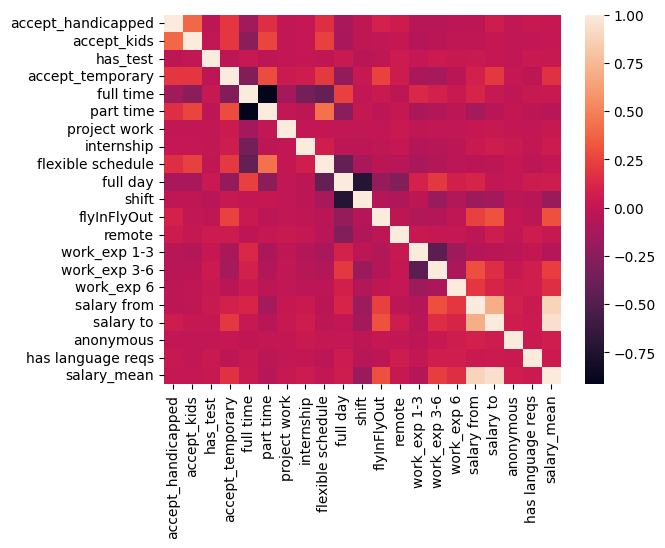

In [441]:
sns.heatmap(df.corr())

In [442]:
# Combinations of variables that cause multicollinearity: part time and full time, full day and shift
# We are removing full time and full day
# The rest of the variables with high correlation are investigated, they do not need to be deleted, as we will do it later
df = df.drop(['full time', 'full day'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720 entries, 0 to 8719
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accept_handicapped         8720 non-null   int64  
 1   accept_kids                8720 non-null   int64  
 2   has_test                   8720 non-null   int64  
 3   professional_roles         8720 non-null   object 
 4   accept_temporary           8720 non-null   int64  
 5   part time                  8720 non-null   int64  
 6   project work               8720 non-null   int64  
 7   internship                 8720 non-null   int64  
 8   flexible schedule          8720 non-null   int64  
 9   shift                      8720 non-null   int64  
 10  flyInFlyOut                8720 non-null   int64  
 11  remote                     8720 non-null   int64  
 12  work_exp 1-3               8720 non-null   int64  
 13  work_exp 3-6               8720 non-null   int64

In [452]:
df.to_excel('data_hh_done.xlsx')
files.download('data_hh_done.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Salary inference

### Regression

In [444]:
df_inf = df.copy()
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720 entries, 0 to 8719
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accept_handicapped         8720 non-null   int64  
 1   accept_kids                8720 non-null   int64  
 2   has_test                   8720 non-null   int64  
 3   professional_roles         8720 non-null   object 
 4   accept_temporary           8720 non-null   int64  
 5   part time                  8720 non-null   int64  
 6   project work               8720 non-null   int64  
 7   internship                 8720 non-null   int64  
 8   flexible schedule          8720 non-null   int64  
 9   shift                      8720 non-null   int64  
 10  flyInFlyOut                8720 non-null   int64  
 11  remote                     8720 non-null   int64  
 12  work_exp 1-3               8720 non-null   int64  
 13  work_exp 3-6               8720 non-null   int64

In [445]:
for category in df_inf['professional_roles common'].unique():
  df_inf[category] = (df_inf['professional_roles common'] == category).astype('int')


df_inf = df_inf.drop(['professional_roles', 'professional_roles common', 'salary_mean', 'salary to'], axis=1)
df_inf

,accept_handicapped,accept_kids,has_test,accept_temporary,part time,project work,internship,flexible schedule,shift,flyInFlyOut,remote,work_exp 1-3,work_exp 3-6,work_exp 6,salary from,anonymous,has language reqs,"Продавец-консультант, продавец-кассир",NaN,"Менеджер по маркетингу, интернет-маркетолог","Инженер-конструктор, инженер-проектировщик","Менеджер по продажам, менеджер по работе с клиентами","Официант, бармен, бариста",Администратор,Кладовщик,Бухгалтер,"Повар, пекарь, кондитер",Водитель,"Упаковщик, комплектовщик",Менеджер по закупкам,Курьер,"Программист, разработчик","Секретарь, помощник руководителя, ассистент"
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"70,000.00",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"60,000.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"130,000.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"75,000.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8716,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8717,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8718,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"47,000.00",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [446]:
df_inf = df_inf.drop(np.nan, axis=1)

In [447]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720 entries, 0 to 8719
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   accept_handicapped                                    8720 non-null   int64  
 1   accept_kids                                           8720 non-null   int64  
 2   has_test                                              8720 non-null   int64  
 3   accept_temporary                                      8720 non-null   int64  
 4   part time                                             8720 non-null   int64  
 5   project work                                          8720 non-null   int64  
 6   internship                                            8720 non-null   int64  
 7   flexible schedule                                     8720 non-null   int64  
 8   shift                                                 8720

In [448]:
df_inf = df_inf.dropna()
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5756 entries, 0 to 8719
Data columns (total 32 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   accept_handicapped                                    5756 non-null   int64  
 1   accept_kids                                           5756 non-null   int64  
 2   has_test                                              5756 non-null   int64  
 3   accept_temporary                                      5756 non-null   int64  
 4   part time                                             5756 non-null   int64  
 5   project work                                          5756 non-null   int64  
 6   internship                                            5756 non-null   int64  
 7   flexible schedule                                     5756 non-null   int64  
 8   shift                                                 5756

In [449]:
import statsmodels.api as sm

y = df_inf['salary from']
x = df_inf.loc[:, df_inf.columns != 'salary from']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            salary from   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     71.28
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        07:03:27   Log-Likelihood:                -69471.
No. Observations:                5756   AIC:                         1.390e+05
Df Residuals:                    5724   BIC:                         1.392e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------